In [57]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import confusion_matrix

In [31]:
dataset_path = "/content/drive/MyDrive/5Animals"

image_data_generator = ImageDataGenerator(
    rescale=1./255.0,
    validation_split=0.1,
    horizontal_flip=True,
    brightness_range=(0.8,1.2)
)

train_dataset = image_data_generator.flow_from_directory(
    dataset_path,
    subset="training",
    batch_size=32,
    target_size=(224,224),
    shuffle=True
)

validation_dataset = image_data_generator.flow_from_directory(
    dataset_path,
    subset="validation",
    batch_size=32,
    target_size=(224,224),
    shuffle=False
)

train_dataset.class_indices

Found 1184 images belonging to 5 classes.
Found 130 images belonging to 5 classes.


{'cat': 0, 'dog': 1, 'elephant': 2, 'giraffe': 3, 'panda': 4}

In [32]:
base_model = MobileNetV2(input_shape=(224,224,3),
    weights='imagenet',
    include_top=False,
    pooling="avg"
)

In [33]:
for layer in base_model.layers[:-4]:
    layer.trainable = False

In [37]:
model = Sequential([
    base_model,
    Dropout(0.5),
    Dense(5,activation='softmax')
])

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [38]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 1280)                │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │           6,405 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,264,389 (8.64 MB)

 Trainable params: 418,565 (1.60 MB)

 Non-trainable params: 1,845,824 (7.04 MB)

In [39]:
history = model.fit(train_dataset,validation_data=validation_dataset,epochs=6,batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/6
37/37 ━━━━━━━━━━━━━━━━━━━━ 35s 686ms/step - accuracy: 0.8249 - loss: 0.5040 - val_accuracy: 0.9769 - val_loss: 0.0779
Epoch 2/6
37/37 ━━━━━━━━━━━━━━━━━━━━ 22s 585ms/step - accuracy: 0.9787 - loss: 0.0654 - val_accuracy: 0.9923 - val_loss: 0.0302
Epoch 3/6
37/37 ━━━━━━━━━━━━━━━━━━━━ 40s 564ms/step - accuracy: 0.9911 - loss: 0.0279 - val_accuracy: 0.9846 - val_loss: 0.0611
Epoch 4/6
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 559ms/step - accuracy: 0.9942 - loss: 0.0202 - val_accuracy: 0.9769 - val_loss: 0.1047
Epoch 5/6
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 565ms/step - accuracy: 0.9988 - loss: 0.0054 - val_accuracy: 0.9846 - val_loss: 0.0665
Epoch 6/6
37/37 ━━━━━━━━━━━━━━━━━━━━ 43s 599ms/step - accuracy: 0.9980 - loss: 0.0044 - val_accuracy: 0.9846 - val_loss: 0.1129


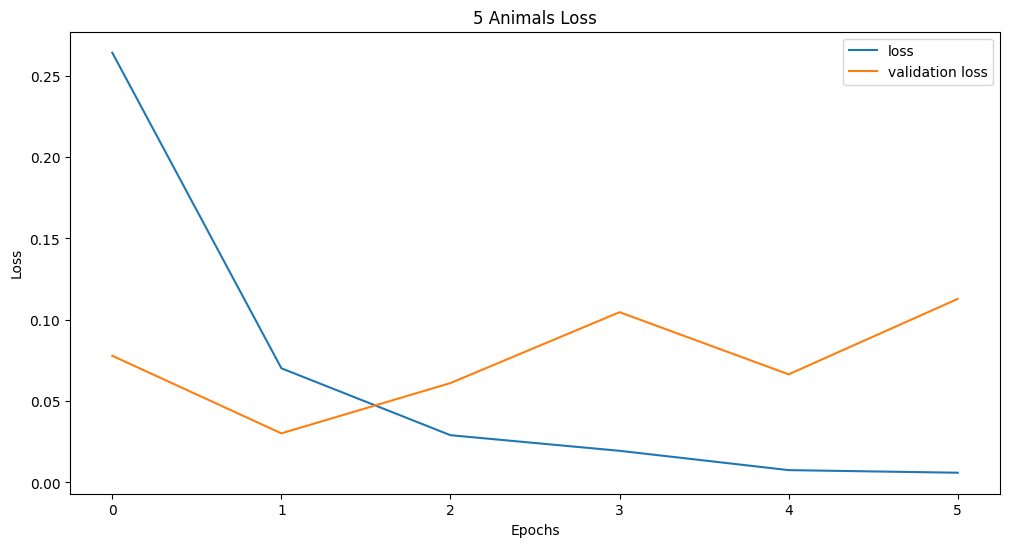

In [53]:
plt.figure(figsize=(12,6))
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="validation loss")
plt.title("5 Animals Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

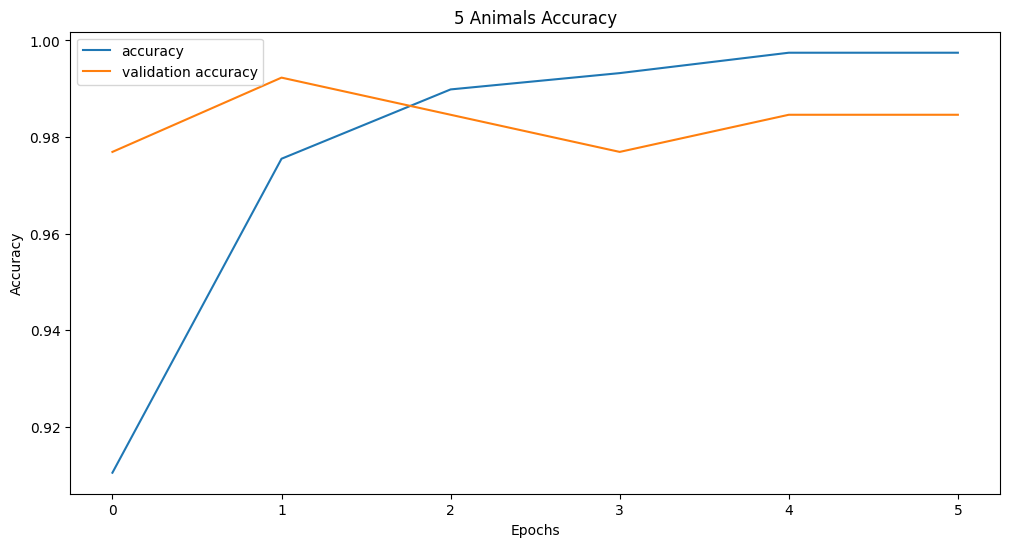

In [56]:
plt.figure(figsize=(12,6))
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="validation accuracy")
plt.title("5 Animals Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [46]:
y_pred = model.predict(validation_dataset)
y_pred = y_pred.argmax(axis=1)
y_true = validation_dataset.classes

cm = confusion_matrix(y_true, y_pred)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 382ms/step


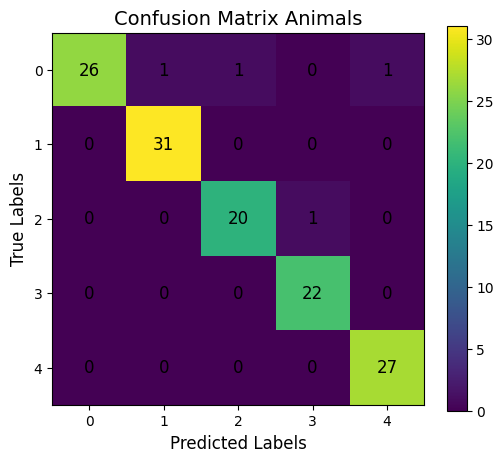

In [52]:
plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest')
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black", fontsize=12)

plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix Animals", fontsize=14)
plt.xticks(np.arange(cm.shape[1]))
plt.yticks(np.arange(cm.shape[0]))
plt.show()

In [58]:
image = cv2.imread("test.png",1)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image = cv2.resize(image,(224,224))
image = image / 255.0
image = image.reshape(1,224,224,3)
output = model.predict(image)
print(np.argmax(output))

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
4


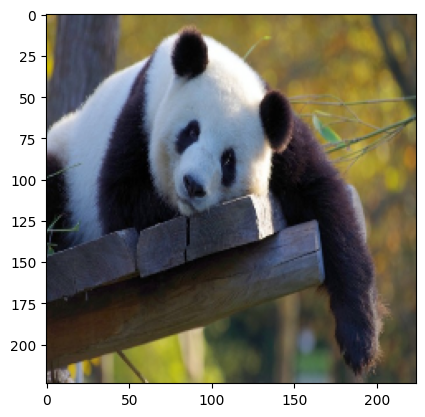

In [60]:
plt.imshow(image[0])
plt.show()